## Import Packages

In [265]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm

https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_pca.html


https://scikit-learn.org/stable/modules/decomposition.html

In [266]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [267]:
X.shape, y.shape

((150, 4), (150,))

In [268]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9, whiten=True)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [269]:
pca.explained_variance_ratio_

array([0.92461872])

In [270]:
X_pca = pca.transform(X)

In [271]:
X_pca.shape

(150, 1)

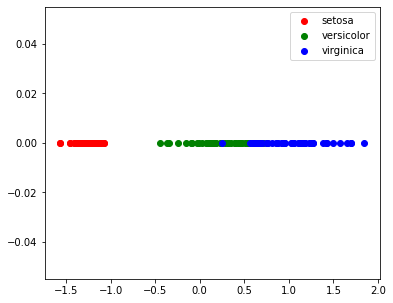

In [272]:
target_ids = range(len(iris.target_names))
plt.figure(figsize=(6,5))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
  plt.scatter(X_pca[y==i, 0], np.zeros(X_pca[y==i].shape), c=c, label=label)
plt.legend()
plt.show()

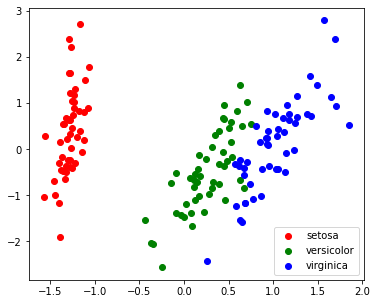

In [273]:
pca = PCA(n_components=2, whiten=True)
pca.fit(X)
X_pca = pca.transform(X)
target_ids = range(len(iris.target_names))
plt.figure(figsize=(6,5))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
  plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], c=c, label=label)
plt.legend()
plt.show()

## PCA Implementation


### Playground

In [274]:
N, d = X.shape

In [275]:
# Sigma = np.mean([np.matmul(np.expand_dims(X[i], axis=1), np.expand_dims(X[i], axis=1).T) for i in range(N)], axis=0)
# Sigma

In [276]:
# Sigma = np.dot(X.T, X) / (N-1)
# Sigma

In [277]:
X.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [278]:
# X.std(axis=0)

In [279]:
# X_prime = (X - X.mean(axis=0)) / X.std(axis=0)

In [280]:
X_prime = X - X.mean(axis=0)

In [281]:
Sigma = np.dot(X_prime.T, X_prime) / (N-1)
Sigma

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [282]:
U, Lambda, V = np.linalg.svd(Sigma)

In [283]:
Lambda

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [284]:
Sigma_new = np.matmul(np.expand_dims(U[:,0],axis=1), np.expand_dims(V[0],axis=1).T) * Lambda[0] + np.matmul(np.expand_dims(U[:,1],axis=1), np.expand_dims(V[1],axis=1).T) * Lambda[1] 
Sigma_new

array([[ 0.656827  , -0.01281273,  1.28139395,  0.53544983],
       [-0.01281273,  0.15958324, -0.33687803, -0.14142037],
       [ 1.28139395, -0.33687803,  3.11033538,  1.30097452],
       [ 0.53544983, -0.14142037,  1.30097452,  0.54416683]])

In [285]:
# X_prime_new = np.dot(np.pad(U[:, :2], pad_width=[(0,0),(0,2)]), X_prime.T).T[:, :2]

In [286]:
U[:,:2]

array([[-0.36138659, -0.65658877],
       [ 0.08452251, -0.73016143],
       [-0.85667061,  0.17337266],
       [-0.3582892 ,  0.07548102]])

In [287]:
X_prime_new = np.dot(U[:,:2].T, X_prime.T).T

In [288]:
X_new = X_prime_new+X.mean(axis=0)[:2]

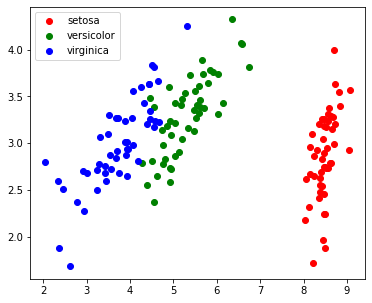

In [289]:
plt.figure(figsize=(6,5))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
  plt.scatter(X_new[y==i, 0], X_new[y==i, 1], c=c, label=label)
plt.legend()
plt.show()

### Construct a PCA function

In [293]:
def myPCA(X:np.ndarray, n_dimensions:int):
  N, d = X.shape

  # Centering
  X_centered = X - X.mean(axis=0) 

  # Covariance Matrix of d*d
  Sigma = np.dot(X_centered.T, X_centered)

  # SVD
  U, Lambda, V = np.linalg.svd(Sigma)

  X_centered_PC = np.dot(U[:,:n_dimensions].T, X_centered.T).T
  X_PC = X_centered_PC + X.mean(axis=0)[:n_dimensions]

  # Purposely rescale and add negative sign to mimic Sklearn's PCA
  return -(X_PC - X_PC.mean(axis=0))/X_PC.std(axis=0) 


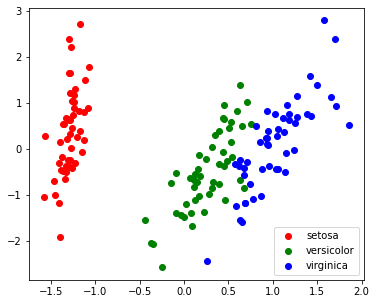

In [291]:
X_PC2 = myPCA(X, 2)

plt.figure(figsize=(6,5))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
  plt.scatter(X_PC2[y==i, 0], X_PC2[y==i, 1], c=c, label=label)
plt.legend()
plt.show()

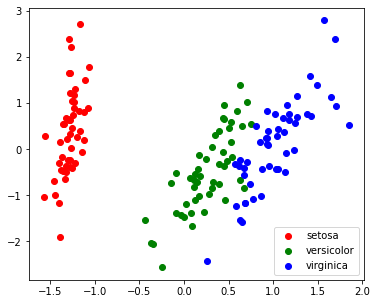

In [295]:
pca = PCA(n_components=2, whiten=True)
pca.fit(X)
X_pca = pca.transform(X)
target_ids = range(len(iris.target_names))
plt.figure(figsize=(6,5))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
  plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], c=c, label=label)
plt.legend()
plt.show()

In [306]:
%cd /content/drive/My Drive/CS229/Notes10-PCA/ 

/content/drive/My Drive/CS229/Notes10-PCA


In [307]:
!jupyter nbconvert --to markdown CS229-Notes10-Principal-components-analysis.ipynb 

[NbConvertApp] Converting notebook CS229-Notes10-Principal-components-analysis.ipynb to markdown
[NbConvertApp] Support files will be in CS229-Notes10-Principal-components-analysis_files/
[NbConvertApp] Making directory CS229-Notes10-Principal-components-analysis_files
[NbConvertApp] Making directory CS229-Notes10-Principal-components-analysis_files
[NbConvertApp] Making directory CS229-Notes10-Principal-components-analysis_files
[NbConvertApp] Making directory CS229-Notes10-Principal-components-analysis_files
[NbConvertApp] Making directory CS229-Notes10-Principal-components-analysis_files
[NbConvertApp] Writing 10959 bytes to CS229-Notes10-Principal-components-analysis.md
